In [57]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [58]:
# Explore data
os.path.exists(r"C:\Users\91852\Downloads\SQL projects\Data clean project\Bookings.csv")
data = pd.read_csv(r"C:\Users\91852\Downloads\SQL projects\Data clean project\Bookings.csv")
data.head(3)
data.tail(3)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
103021,31-07-2024 13:59,0.582639,CNR1286151233,Success,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,NaN,NaN,No,NaN,2201,Cash,37,3.6,3.2
103022,31-07-2024 14:56,0.622222,CNR2027162035,Success,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,NaN,NaN,No,NaN,267,UPI,47,3.4,3.1
103023,31-07-2024 13:57,0.581250,CNR9770709721,Success,CID217959,Auto,Ulsoor,Hennur,175.0,125.0,NaN,NaN,No,NaN,462,UPI,3,4.8,4.4


In [59]:
data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  float64
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

(103024, 19)

In [60]:
data.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
dtype: int64

In [61]:
data.isnull().sum() / len(data) *100

Date                           0.000000
Time                           0.000000
Booking_ID                     0.000000
Booking_Status                 0.000000
Customer_ID                    0.000000
Vehicle_Type                   0.000000
Pickup_Location                0.000000
Drop_Location                  0.000000
V_TAT                         37.910584
C_TAT                         37.910584
Canceled_Rides_by_Customer    89.809171
Canceled_Rides_by_Driver      82.107082
Incomplete_Rides              37.910584
Incomplete_Rides_Reason       96.189237
Booking_Value                  0.000000
Payment_Method                37.910584
Ride_Distance                  0.000000
Driver_Ratings                37.910584
Customer_Rating               37.910584
dtype: float64

In [62]:
(data.isnull().sum().sum() / (data.shape[0]*data.shape[1]))*100

np.float64(26.08257861223956)

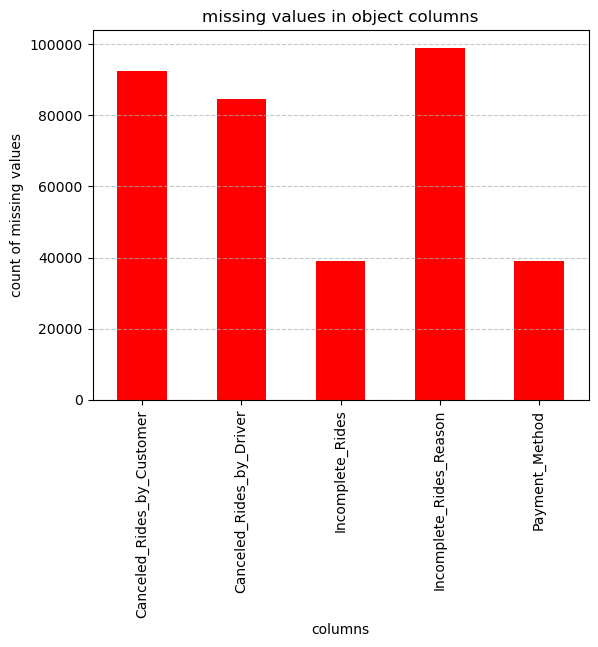

In [63]:
object_cols = data.select_dtypes(include=["object"]).columns
missing_object = data[object_cols].isnull().sum()

missing_object = missing_object[missing_object > 0]

plt.Figure(figsize=(10,5))
missing_object.plot(kind='bar',color='red')
plt.title("missing values in object columns")
plt.xlabel('columns')
plt.ylabel("count of missing values")
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

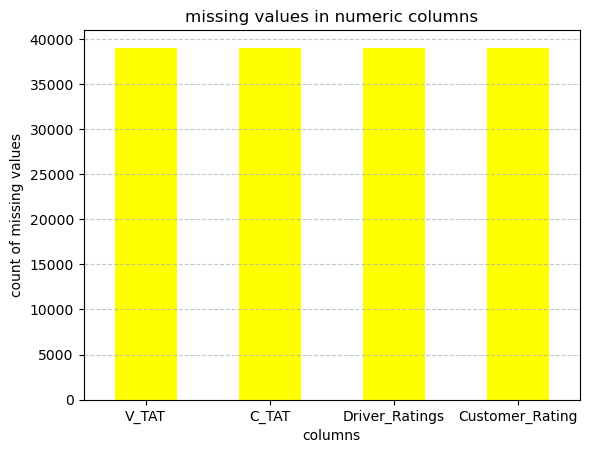

In [64]:
numeric_cols = data.select_dtypes(include=['float64','int64']).columns
missing_numerics = data[numeric_cols].isnull().sum()
missing_numerics = missing_numerics[missing_numerics > 0]

plt.Figure(figsize=(10,5))
missing_numerics.plot(kind='bar',color='yellow')
plt.title("missing values in numeric columns")
plt.xlabel("columns")
plt.ylabel('count of missing values')
plt.xticks(rotation=360)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

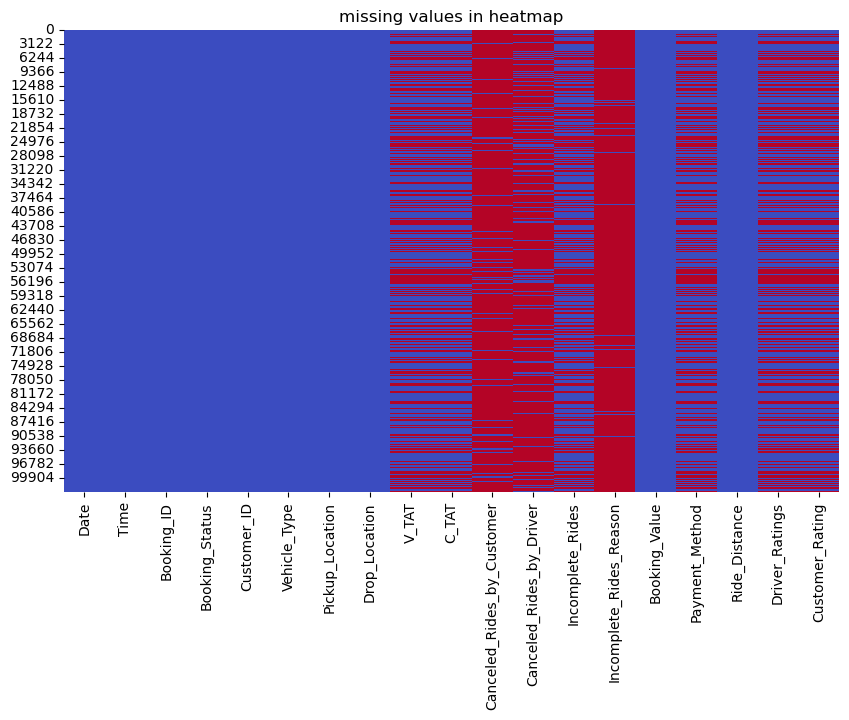

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False,cmap='coolwarm')
plt.title('missing values in heatmap')
plt.show()

In [66]:
data[["V_TAT","C_TAT"]] = data[["V_TAT","C_TAT"]].fillna(0)
data[["V_TAT","C_TAT"]].isnull().sum()

V_TAT    0
C_TAT    0
dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  float64
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       103024 non-null  float64
 9   C_TAT                       103024 non-null  float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

In [68]:
cols = ["Canceled_Rides_by_Driver","Canceled_Rides_by_Customer"]

for col in cols:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())
    print(data[col].value_counts())
    


Unique values in 'Canceled_Rides_by_Driver':
['Personal & Car related issue' nan 'Customer was coughing/sick'
 'Customer related issue' 'More than permitted people in there']
Canceled_Rides_by_Driver
Personal & Car related issue           6542
Customer related issue                 5413
Customer was coughing/sick             3654
More than permitted people in there    2825
Name: count, dtype: int64

Unique values in 'Canceled_Rides_by_Customer':
[nan 'Driver is not moving towards pickup location'
 'Driver asked to cancel' 'AC is Not working' 'Change of plans'
 'Wrong Address']
Canceled_Rides_by_Customer
Driver is not moving towards pickup location    3175
Driver asked to cancel                          2670
Change of plans                                 2081
AC is Not working                               1568
Wrong Address                                   1005
Name: count, dtype: int64


In [69]:
for col in ["Canceled_Rides_by_Driver","Canceled_Rides_by_Customer"]:
    data[col].fillna(data[col].mode()[0],inplace=True)

data[["Canceled_Rides_by_Driver", "Canceled_Rides_by_Customer"]].isnull().sum()

Canceled_Rides_by_Driver      0
Canceled_Rides_by_Customer    0
dtype: int64

In [77]:
data["Payment_Method"].fillna("No payment",inplace=True)
data["Payment_Method"].isnull().sum()

np.int64(0)

In [70]:
for col in data.select_dtypes(include="object").columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.select_dtypes(include="object").isnull().sum()

Date                          0
Booking_ID                    0
Booking_Status                0
Customer_ID                   0
Vehicle_Type                  0
Pickup_Location               0
Drop_Location                 0
Canceled_Rides_by_Customer    0
Canceled_Rides_by_Driver      0
Incomplete_Rides              0
Incomplete_Rides_Reason       0
Payment_Method                0
dtype: int64

In [71]:
for col in data.select_dtypes(include='object').columns:
    print(f'mode of "{col}":{data[col].mode()[0]}')

mode of "Date":01-07-2024 20:09
mode of "Booking_ID":CNR1000051055
mode of "Booking_Status":Success
mode of "Customer_ID":CID954071
mode of "Vehicle_Type":Prime Sedan
mode of "Pickup_Location":Banashankari
mode of "Drop_Location":Peenya
mode of "Canceled_Rides_by_Customer":Driver is not moving towards pickup location
mode of "Canceled_Rides_by_Driver":Personal & Car related issue
mode of "Incomplete_Rides":No
mode of "Incomplete_Rides_Reason":Customer Demand
mode of "Payment_Method":Cash


In [72]:
data[data.duplicated()]
data.duplicated().sum()

np.int64(0)

In [73]:
for col in data.select_dtypes(include=["int64","Float64"]).columns:
    data[col].fillna(data[col].mean(), inplace= True)

data.select_dtypes(include=["float64","int64"]).isnull().sum()

data.describe()

,Time,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024.000000,103024.000000,103024.000000,103024.000000,103024.000000,103024.000000,103024.000000
mean,0.499045,106.096502,52.697381,548.751883,14.189927,3.997457,3.998313
std,0.288235,104.532203,50.005090,536.541221,15.776270,0.454526,0.456199
min,0.000000,0.000000,0.000000,100.000000,0.000000,3.000000,3.000000
25%,0.250694,0.000000,0.000000,242.000000,0.000000,3.800000,3.800000
50%,0.498611,84.000000,45.000000,386.000000,8.000000,3.997457,3.998313
75%,0.747917,196.000000,95.000000,621.000000,26.000000,4.200000,4.200000
max,0.999306,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000


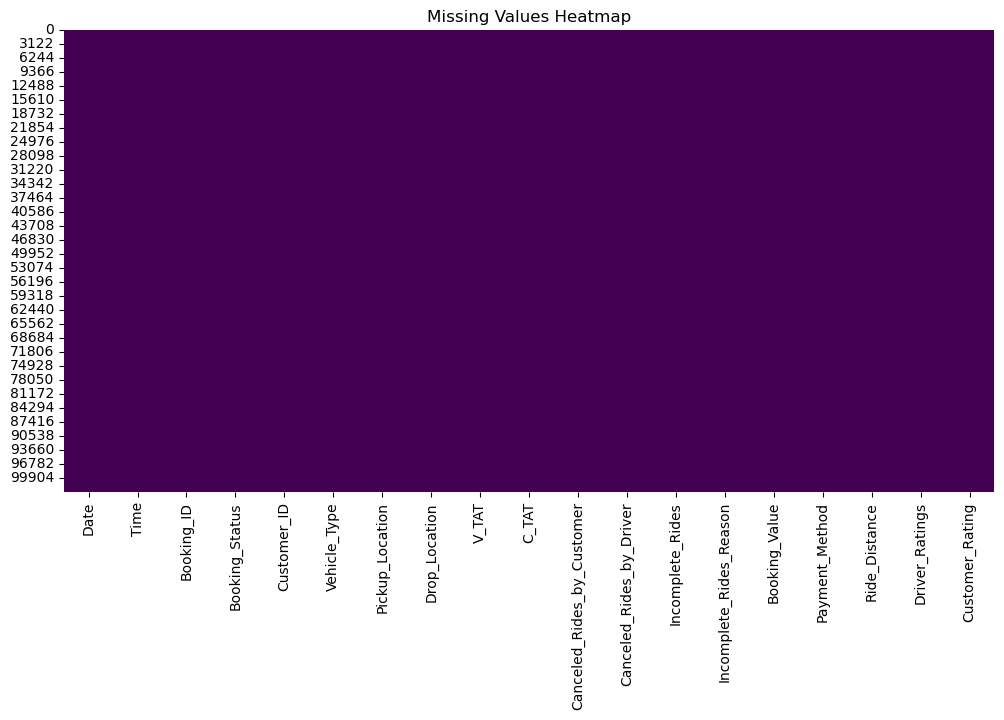

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [78]:
data.isnull().sum().sum()
data.shape

(103024, 19)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  datetime64[ns]
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       103024 non-null  float64       
 9   C_TAT                       103024 non-null  float64       
 10  Canceled_Rides_by_Customer  103024 non-null  object        
 11  Canceled_Rides_by_Driver    103024 non-

In [89]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data["Time"])
